# Problem Statement

Whether out at a restaurant or buying tickets to a concert, modern life counts on the convenience of a credit card to make daily purchases. It saves us from carrying large amounts of cash and also can advance a full purchase that can be paid over time. How do card issuers know we’ll pay back what we charge? That’s a complex problem with many existing solutions—and even more potential improvements, to be explored in this competition.

Credit default prediction is central to managing risk in a consumer lending business. Credit default prediction allows lenders to optimize lending decisions, which leads to a better customer experience and sound business economics. Current models exist to help manage risk. But it's possible to create better models that can outperform those currently in use.

American Express is a globally integrated payments company. The largest payment card issuer in the world, they provide customers with access to products, insights, and experiences that enrich lives and build business success.

In this competition, you’ll apply your machine learning skills to predict credit default. Specifically, you will leverage an industrial scale data set to build a machine learning model that challenges the current model in production. Training, validation, and testing datasets include time-series behavioral data and anonymized customer profile information. You're free to explore any technique to create the most powerful model, from creating features to using the data in a more organic way within a model.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading and understanding data

In [5]:
train_data = pd.read_feather('/content/drive/MyDrive/amex/train_data.ftr')

In [5]:
train_data.shape

(5531451, 190)

In [6]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,NaN,0.001034,0.004837,NaN,0.

In [7]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column       Dtype   
---   ------       -----   
 0    customer_ID  object  
 1    S_2          object  
 2    P_2          float16 
 3    D_39         float16 
 4    B_1          float16 
 5    B_2          float16 
 6    R_1          float16 
 7    S_3          float16 
 8    D_41         float16 
 9    B_3          float16 
 10   D_42         float16 
 11   D_43         float16 
 12   D_44         float16 
 13   B_4          float16 
 14   D_45         float16 
 15   B_5          float16 
 16   R_2          float16 
 17   D_46         float16 
 18   D_47         float16 
 19   D_48         float16 
 20   D_49         float16 
 21   B_6          float16 
 22   B_7          float16 
 23   B_8          float16 
 24   D_50         float16 
 25   D_51         float16 
 26   B_9          float16 
 27   R_3          float16 
 28   D_52         float16 
 29   P_3         

There are 190 columns in the dataset. S_2 is a date column

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,5485466.0,NaN,0.000000,-4.589844e-01,0.480225,0.694336,0.864746,1.009766
D_39,5531451.0,NaN,0.000000,0.000000e+00,0.004528,0.009056,0.236694,5.390625
B_1,5531451.0,NaN,0.000000,-7.589844e+00,0.008865,0.031342,0.125854,1.324219
B_2,5529435.0,NaN,0.000000,0.000000e+00,0.105347,0.814453,1.001953,1.009766
R_1,5531451.0,NaN,0.000000,0.000000e+00,0.002895,0.005783,0.008659,3.255859
S_3,4510907.0,NaN,0.000000,-6.269531e-01,0.127319,0.163940,0.258057,5.484375
D_41,5529435.0,NaN,0.000000,0.000000e+00,0.002872,0.005745,0.008614,8.992188
B_3,5529435.0,NaN,0.000000,0.000000e+00,0.005226,0.009781,0.155029,1.625000
D_42,791314.0,NaN,0.000000,-4.544258e-04,0.037506,0.120544,0.250977,4.191406
D_43,3873055.0,NaN,0.000000,1.192093e-07,0.042267,0.088501,0.184326,10.109375


### Missing Values

In [9]:
train_data.isnull().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
B_2               2016
R_1                  0
S_3            1020544
D_41              2016
B_3               2016
D_42           4740137
D_43           1658396
D_44            274319
B_4                  0
D_45              2017
B_5                  0
R_2                  0
D_46           1211699
D_47                 0
D_48            718725
D_49           4985917
B_6                233
B_7                  0
B_8              22268
D_50           3142402
D_51                 0
B_9                  0
R_3                  0
D_52             29563
P_3             301492
B_10                 0
D_53           4084585
S_5                  0
B_11                 0
S_6                  0
D_54              2016
R_4                  0
S_7            1020544
B_12                 0
S_8                  0
D_55            184803
D_56           2990943
B_13             49519
R_5        

In [10]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(40)

,Total,Percent
D_87,5527586,0.999301
D_88,5525447,0.998915
D_108,5502513,0.994768
D_111,5500117,0.994335
D_110,5500117,0.994335
B_39,5497819,0.993920
D_73,5475595,0.989902
B_42,5459973,0.987078
D_134,5336752,0.964801
D_135,5336752,0.964801


#### Unique customers in the dataset

In [11]:
print(f'Number of unique customers: {train_data["customer_ID"].nunique()}')

Number of unique customers: 458913


### Exploratory Data Analysis

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables
with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

#### Feature Distribution

In [12]:
features_Delinquency = [f for f in train_data.columns if f.startswith('D_')]
features_Spend = [f for f in train_data.columns if f.startswith('S_')]
features_Payment = [f for f in train_data.columns if f.startswith('P_')]
features_Balance = [f for f in train_data.columns if f.startswith('B_')]
features_Risk = [f for f in train_data.columns if f.startswith('R_')]
print(f'Total number of Delinquency variables: {len(features_Delinquency)}')
print(f'Total number of Spend variables: {len(features_Spend)}')
print(f'Total number of Payment variables: {len(features_Payment)}')
print(f'Total number of Balance variables: {len(features_Balance)}')
print(f'Total number of Risk variables: {len(features_Risk)}')

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


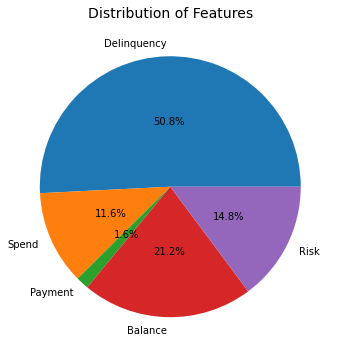

In [13]:
column = [len(features_Delinquency),len(features_Spend),len(features_Payment),len(features_Balance),len(features_Risk)]
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Delinquency','Spend','Payment','Balance','Risk']
plt.pie(x=column, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Distribution of Features", fontsize=14);

#### Target Variable

In [6]:
train_labels = pd.read_csv('/content/drive/MyDrive/amex/train_labels.csv')

In [15]:
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [ ]:
train_data = pd.merge(train_data, train_labels, how='inner', on = 'customer_ID')

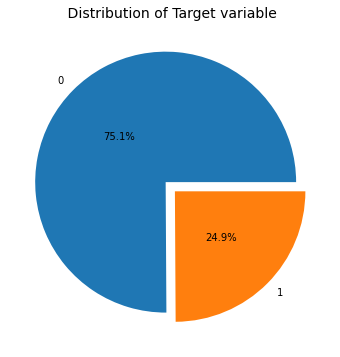

In [17]:
column = train_data['target'].value_counts(normalize=True)
pie, ax = plt.subplots(figsize=[10,6])
labels = column.keys()
plt.pie(x=column, autopct="%.1f%%", labels=labels, pctdistance=0.5,explode=[0.05]*2)
plt.title(" Distribution of Target variable", fontsize=14);

#### Converting S_2 into datetime column

In [18]:
train_data['S_2']= pd.to_datetime(train_data['S_2'])

#### Analyzing Categorical columns

In [19]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
for col in categorical_columns:
    train_data[col] = train_data[col].astype(object)

In [20]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5531451 entries, 0 to 5531450
Data columns (total 191 columns):
 #    Column       Dtype         
---   ------       -----         
 0    customer_ID  object        
 1    S_2          datetime64[ns]
 2    P_2          float16       
 3    D_39         float16       
 4    B_1          float16       
 5    B_2          float16       
 6    R_1          float16       
 7    S_3          float16       
 8    D_41         float16       
 9    B_3          float16       
 10   D_42         float16       
 11   D_43         float16       
 12   D_44         float16       
 13   B_4          float16       
 14   D_45         float16       
 15   B_5          float16       
 16   R_2          float16       
 17   D_46         float16       
 18   D_47         float16       
 19   D_48         float16       
 20   D_49         float16       
 21   B_6          float16       
 22   B_7          float16       
 23   B_8          float16       
 2

In [21]:
def categorical_plot(data, colname,xticks=0):
    fig, axs = plt.subplots(1,3,figsize=(20,6))
    target1 = ((data[data.target == 1][colname].value_counts().sort_values(ascending=False) / data[colname].value_counts().sort_values(ascending=False))*100).round(2)
    target0 = ((data[data.target == 0][colname].value_counts().sort_values(ascending=False) / data[colname].value_counts().sort_values(ascending=False))*100).round(2)
    target = ((data[colname].value_counts().sort_values(ascending=False) / data.shape[0])*100).round(2)
    # sns.countplot(x= colname,data=data, ax=axs[0]).set_title("Distribution of Loans based on "+colname)
    axs[0].set(xlabel=colname, ylabel='Total Percentage')
    sns.barplot(x= target.index,y=target.values,ax=axs[0]).set_title("Distribution of Loans based on "+colname)
    #sns.countplot(x= colname,data=data, hue='TARGET',ax=axs[0, 1]).set_title(colname+" Distribution by Target")
    sns.barplot(x= target0.index,y=target0.values,ax=axs[1]).set_title(colname+" by Non Defaulter")
    axs[1].set(xlabel=colname, ylabel='Percentage of Non Defaulters')
    sns.barplot(x= target1.index,y=target1.values,ax=axs[2]).set_title(colname+" by Defaulter")
    plot3 =axs[2].set(xlabel=colname, ylabel='Percentage of Defaulters')
    def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          if height>0:
            ax.text(rect.get_x()+0.2, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12,family='serif',style="normal",weight="light")
    for ax in axs.flatten():
        for label in ax.get_xticklabels():
            label.set_rotation(xticks)
            autolabel(ax.patches)

    plt.show()

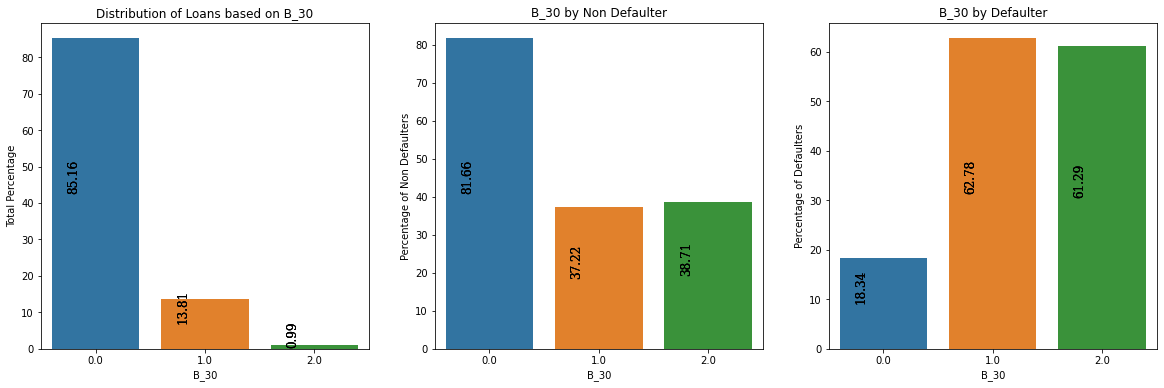

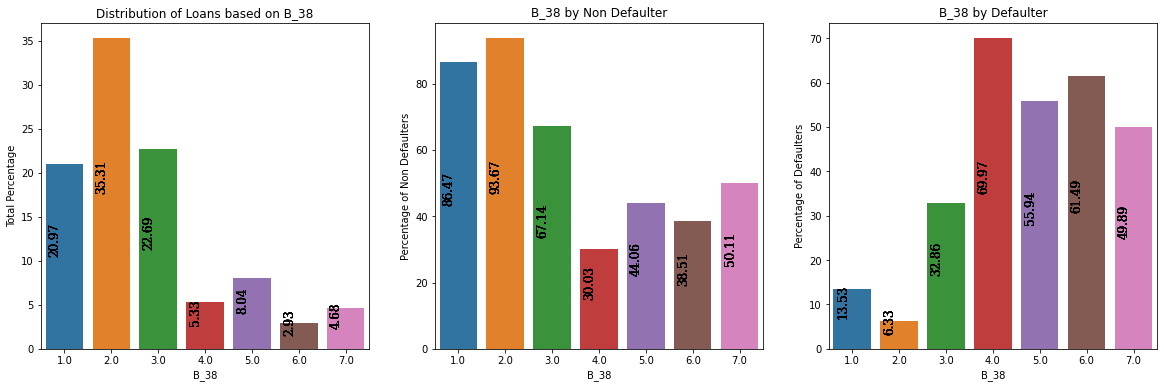

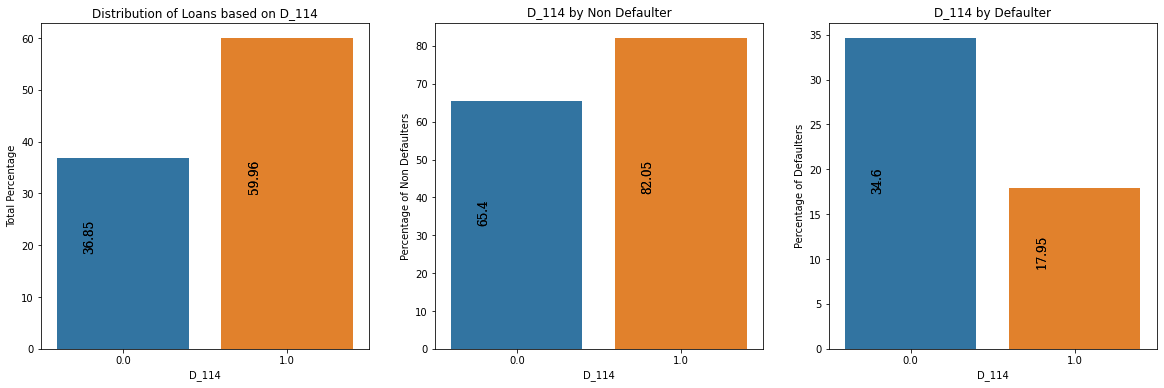

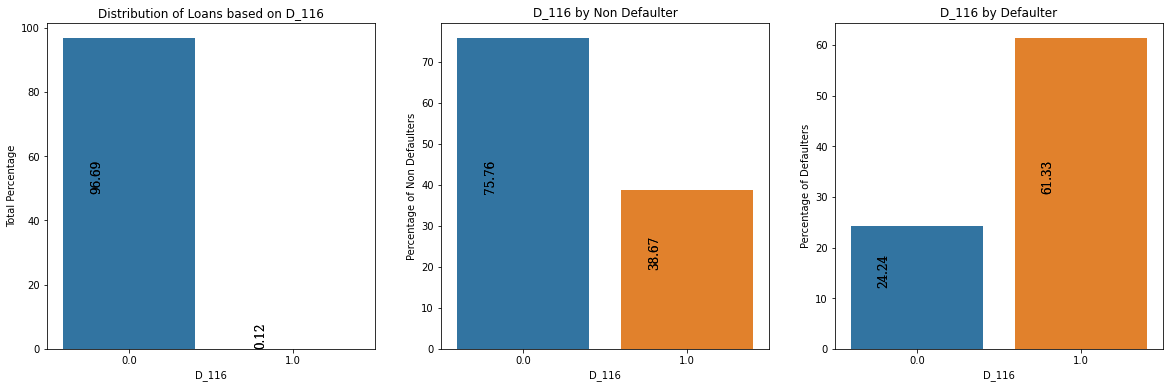

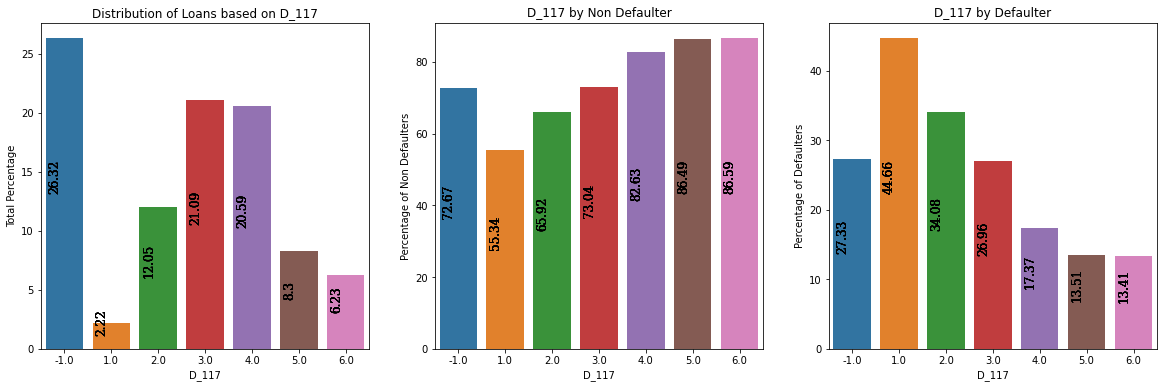

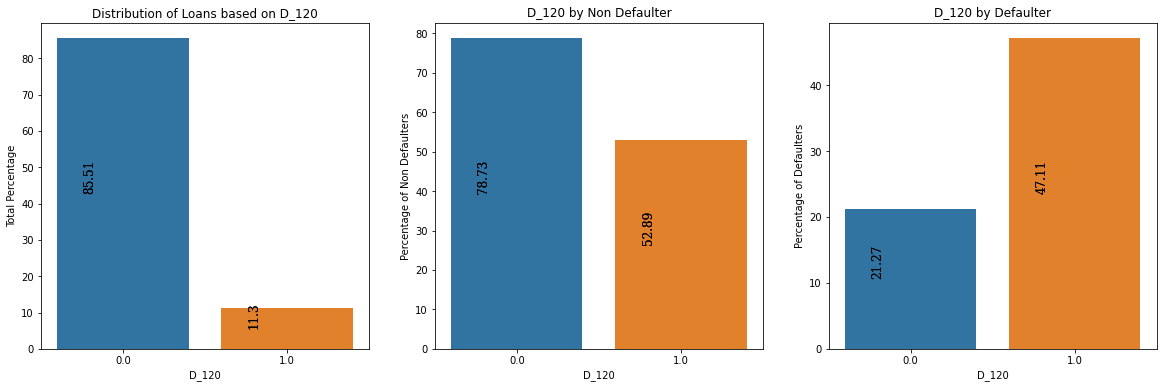

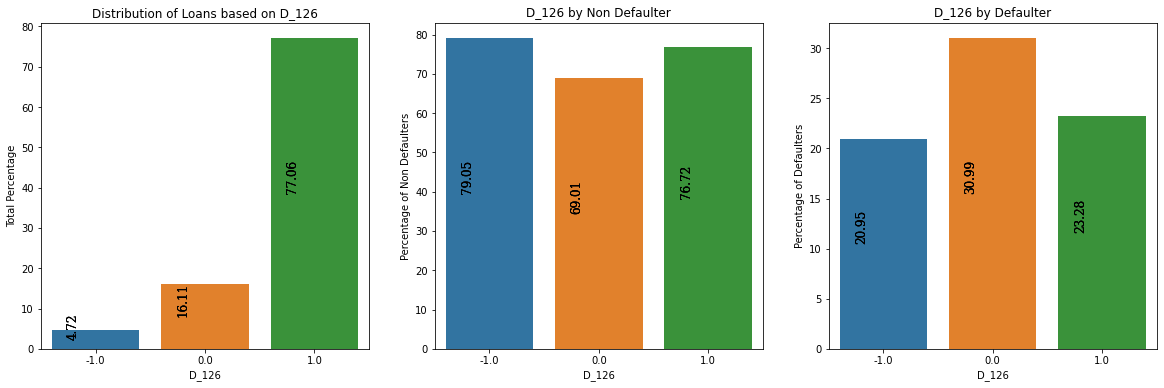

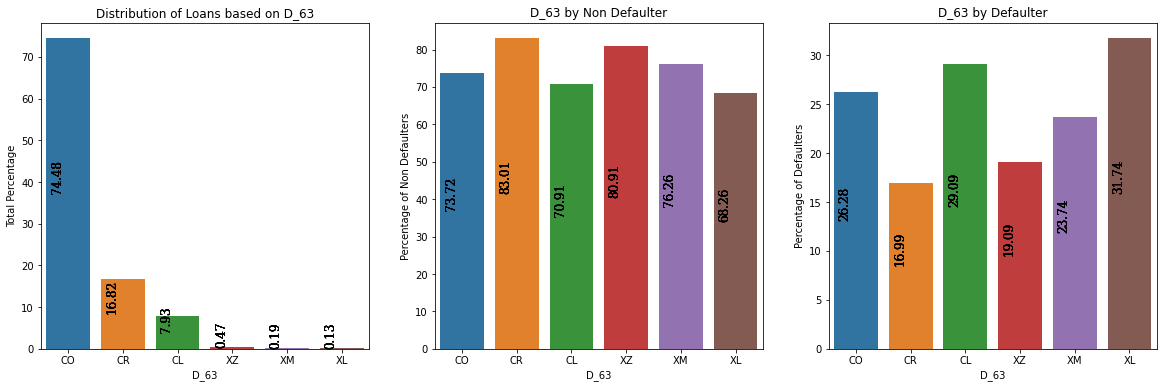

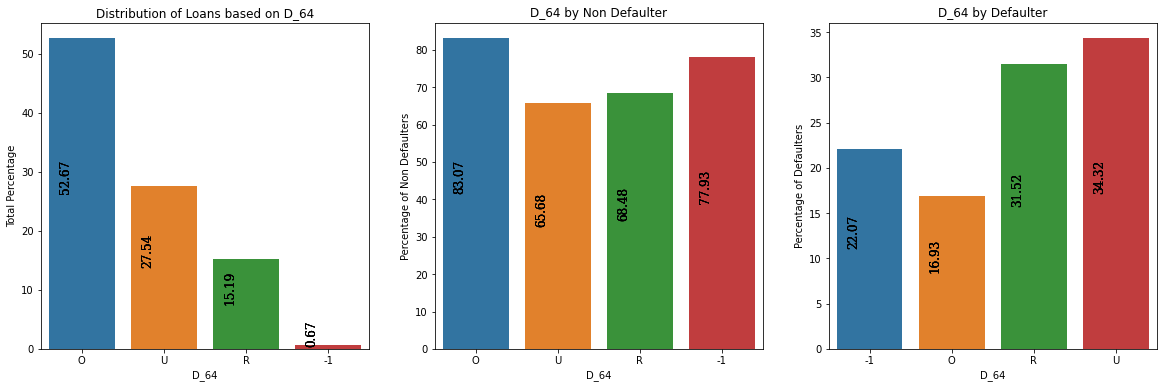

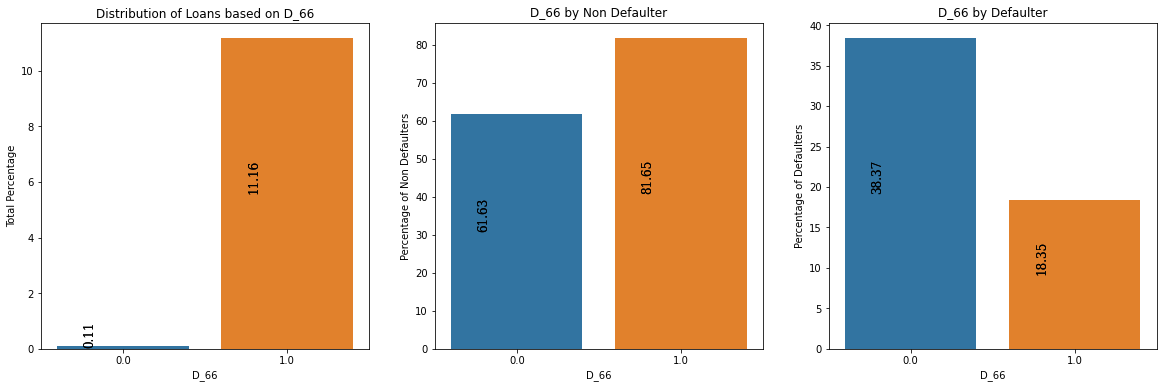

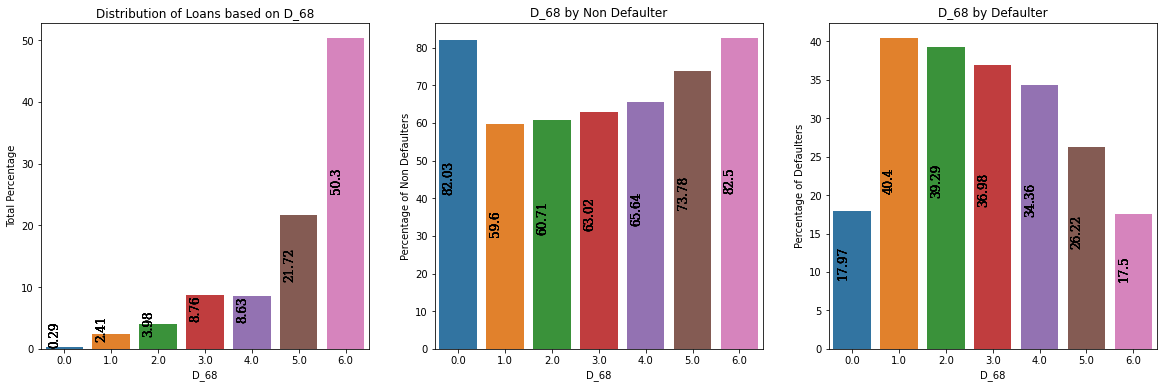

In [22]:
for col in categorical_columns:
    categorical_plot(train_data,col)

#### No of statements per customer

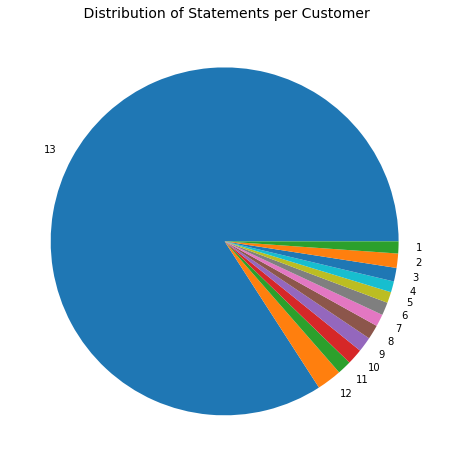

In [23]:
column = train_data.customer_ID.value_counts().value_counts().sort_index(ascending=False)
pie, ax = plt.subplots(figsize=[10,8])
labels = column.keys()
plt.pie(x=column, labels=labels, pctdistance=0.5)
plt.title(" Distribution of Statements per Customer", fontsize=14);

In [24]:
train_data.customer_ID.value_counts().value_counts().sort_index(ascending=False)

13    386034
12     10623
11      5961
10      6721
9       6411
8       6110
7       5198
6       5515
5       4671
4       4673
3       5778
2       6098
1       5120
Name: customer_ID, dtype: int64

Around 84% customers have 13 statements

In [25]:
tempcols = []
for i in train_data.columns:
    if train_data[i].nunique() <= 2:
        tempcols.append(i)
print(tempcols)

['D_66', 'D_87', 'B_31', 'D_114', 'D_116', 'D_120', 'target']


In [26]:
train_data[tempcols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5531451 entries, 0 to 5531450
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   D_66    object 
 1   D_87    float16
 2   B_31    int64  
 3   D_114   object 
 4   D_116   object 
 5   D_120   object 
 6   target  int64  
dtypes: float16(1), int64(2), object(4)
memory usage: 306.0+ MB


B_31 and D_87 have binary values.B_31 is always 0 or 1.
D_87 is 1 or missing values

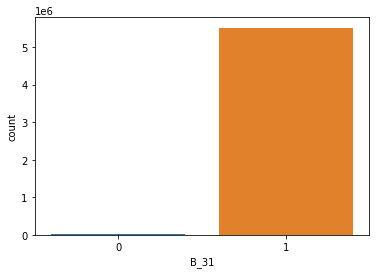

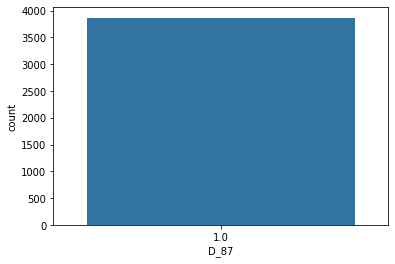

In [27]:
for col in ['B_31','D_87']:
    sns.countplot(data=train_data, x=col)
    plt.show()

In [ ]:
train_data.corr()


In [ ]:
train_data_corr =  train_data.corr(method='pearson')
corr=train_data_corr.where(np.triu(np.ones(train_data_corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

corr_df.columns = ['Variable1','Variable2','CORRELATION']
corr_df['CORR_ABS'] = abs(corr_df['CORRELATION'])
corr_df.sort_values('CORR_ABS', ascending=False).head(30)

In [ ]:
num_features  = train_data.select_dtypes(include = np.number).columns
train_num_agg = train_data.groupby("customer_ID")[num_features].agg(['mean', 'std', 'min', 'max', 'last'])

In [ ]:
train_num_agg.columns = ['_'.join(x) for x in train_num_agg.columns]
train_num_agg.reset_index(inplace = True)

In [ ]:
train_num_agg.head()

In [ ]:
train_num_agg.shape

In [ ]:
train_num_agg = train_data.groupby("customer_ID")

In [1]:
train_data['year_month'] = train_data['S_2'].dt.to_period('M')

NameError: ignored